In [91]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [92]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDCA.csv")
#df_All = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')


In [93]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [94]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [#'Date', 
                   #'FFC55553' ,'LC55555', 'FC55003', 'LC55557', 'FFC55555','LC55553', 
                   'TI55021', 'TC55555'
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [95]:
print(df_All.describe())

            Butanol       425 %Al       TC55552       DI55102       FC55569  \
count  56692.000000  56692.000000  56692.000000  56692.000000  56692.000000   
mean      10.159097      6.102568    167.848708      0.929183   6542.683482   
std       10.766912      0.307167     15.014702      0.066439    380.329468   
min        0.010000      4.573810    119.869000      0.794535   5096.080000   
25%        3.725195      5.969493    156.235000      0.889793   6295.522500   
50%        5.920780      6.120565    170.625000      0.938533   6529.010000   
75%       11.642100      6.267622    179.313000      0.979955   6767.337500   
max       60.346700      7.571230    207.426000      1.068230   8014.950000   

            DI55152       FC55576       TI55017       FC42428      AYC55580  \
count  56692.000000  56692.000000  56692.000000  56692.000000  56692.000000   
mean       0.948213    423.616848    186.704144  34949.282507     11.190763   
std        0.043248    260.435270      9.778964   5

In [96]:
# Assuming your data is in filtered_df and you want to predict 'target_column_name'
X = df_All.drop('Butanol', axis=1)  # Replace 'target_column_name' with your target column's name
y = df_All['Butanol']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [100]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 30.921767569041588


In [101]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 5.560734445110788


In [102]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.2f}")

R-squared value: 0.74


In [103]:
current_features = X.columns.tolist()

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    """
    Compute the adjusted R^2 from R^2, number of samples (n) and number of predictors (k).
    
    Args:
    - r2 (float): R^2 value
    - n (int): number of samples
    - k (int): number of predictors

    Returns:
    - float: adjusted R^2 value
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


adj_r2 = adjusted_r2(r2, len(y_test), len(current_features))

print(f"Adjusted R^2 value: {adj_r2}")

Adjusted R^2 value: 0.7379762220731803


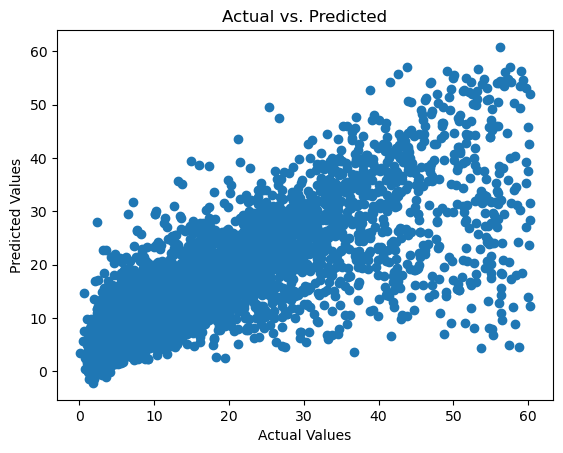

In [104]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


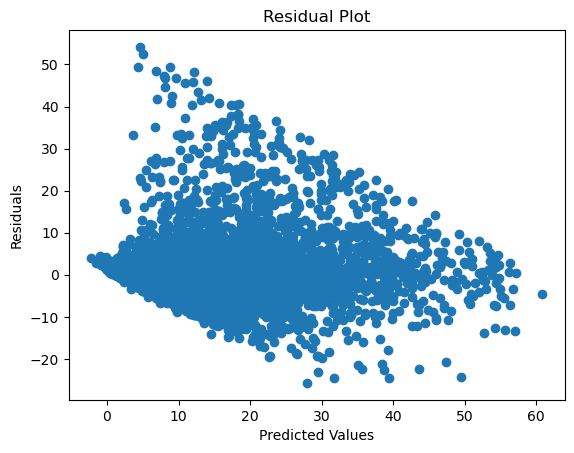

In [105]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
